<a href="https://colab.research.google.com/github/swapnalisingh13/Deep_Learning/blob/main/DL_Lab4_2348565.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#resampling
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler
#model building
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#metrics
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [50]:
df=pd.read_csv('/content/Telco_customer_churn_status.csv')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [51]:
df.shape

(7043, 33)

In [52]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [53]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [55]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [56]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

other than churn reason no missing value is there.
deleting churn Reason because we don't need it.

In [57]:
df=df.drop(columns='Churn Reason')
df.shape

(7043, 32)

In [58]:
#filling NaN values with 0
df=df.fillna(0)

Checking for Data Imbalancing

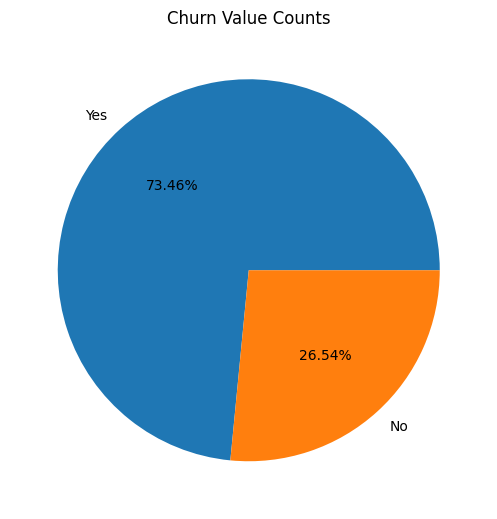

In [59]:
#pie chart to see the percentage
diag = df['Churn Value'].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(diag, labels=['Yes', 'No'], autopct="%.2f%%")
plt.title('Churn Value Counts')
plt.tight_layout()
plt.show()

In [60]:
unique_labels = df['Churn Value'].unique()
print(unique_labels)

[1 0]


In [61]:
#resampling
no_class = df[df['Churn Value'] == 0]
yes_class = df[df['Churn Value'] == 1]

No_Class = resample(no_class, replace=True, n_samples=len(yes_class), random_state=42)

down_samples = pd.concat([yes_class, No_Class])
print(no_class.shape)
print(yes_class.shape)

(5174, 32)
(1869, 32)


In [62]:
down_samples.shape

(3738, 32)

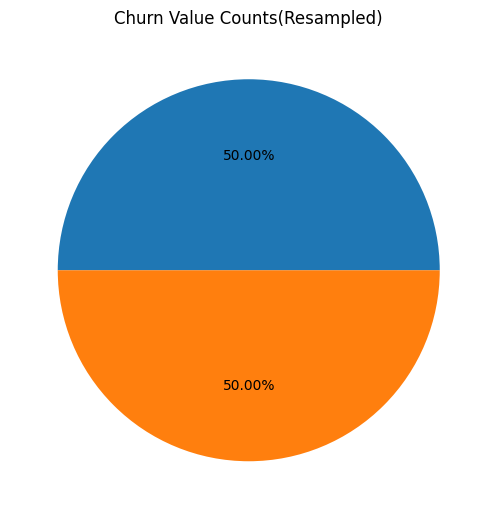

In [63]:
diag = down_samples['Churn Value'].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(diag, autopct="%.2f%%")
plt.title('Churn Value Counts(Resampled)')
plt.tight_layout()
plt.show()

In [64]:
down_samples.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
dtype: object

In [65]:
down_samples.drop(columns=['CustomerID', 'Count', 'Country', 'Zip Code', 'State', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Score', 'CLTV', 'Monthly Charges','Total Charges'], inplace=True)

In [66]:
down_samples.dtypes

City                 object
Gender               object
Senior Citizen       object
Partner              object
Dependents           object
Tenure Months         int64
Phone Service        object
Multiple Lines       object
Internet Service     object
Online Security      object
Online Backup        object
Device Protection    object
Tech Support         object
Streaming TV         object
Streaming Movies     object
Contract             object
Paperless Billing    object
Payment Method       object
Churn Value           int64
dtype: object

One-Hot Encoding

In [67]:
df1 = pd.get_dummies(down_samples, columns=['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                                                   'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                                                   'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                                                  'Contract', 'Paperless Billing', 'Payment Method'])


Model Building

In [68]:
X = df1.drop(columns=['Churn Value'])
y = df1['Churn Value']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
#DNN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [90]:
#DNN model with dropout
model1 = Sequential()
model1.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dropout(0.5))
model1.add(Dense(units=64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=1, activation='sigmoid'))

In [91]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0808 - accuracy: 0.9689 - val_loss: 1.3210 - val_accuracy: 0.7219
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0656 - accuracy: 0.9753 - val_loss: 1.3642 - val_accuracy: 0.7259
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0542 - accuracy: 0.9816 - val_loss: 1.4520 - val_accuracy: 0.7259
Epoch 4/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0451 - accuracy: 0.9863 - val_loss: 1.5560 - val_accuracy: 0.7219
Epoch 5/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.9896 - val_loss: 1.6203 - val_accuracy: 0.7072
Epoch 6/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 1.6780 - val_accuracy: 0.7179
Epoch 7/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0266 - accuracy: 0.9936 - val_loss: 1.7500 - val_accuracy: 0.7219
Epoch 8/20
94/94 [==

In [92]:
model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
94/94 [==============================] - 2s 7ms/step - loss: 0.8475 - accuracy: 0.5876 - val_loss: 0.5980 - val_accuracy: 0.7233
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 0.6114 - accuracy: 0.7067 - val_loss: 0.5849 - val_accuracy: 0.7206
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 0.5266 - accuracy: 0.7495 - val_loss: 0.5728 - val_accuracy: 0.7299
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4603 - accuracy: 0.7943 - val_loss: 0.6129 - val_accuracy: 0.7233
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4207 - accuracy: 0.8114 - val_loss: 0.6365 - val_accuracy: 0.7219
Epoch 6/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3768 - accuracy: 0.8294 - val_loss: 0.7040 - val_accuracy: 0.7166
Epoch 7/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3467 - accuracy: 0.8482 - val_loss: 0.7598 - val_accuracy: 0.7206
Epoch 8/20
94/94 [==

In [93]:
pred1 = model.predict(X_test)
dpred1 = model.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [94]:
threshold = 0.5
pred = (pred1 > threshold).astype(int)
dpred = (dpred1 > threshold).astype(int)

In [88]:
classification_report_output = classification_report(y_test, pred)
loss1, accuracy1 = model.evaluate(X_test, y_test)
print('Model accuracy Base DNN: ', accuracy1)
print("Classification Report:")
print(classification_report_output)

24/24 [==============================] - 0s 4ms/step - loss: 2.4804 - accuracy: 0.7246
Model accuracy Base DNN:  0.7245989441871643
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       369
           1       0.74      0.70      0.72       379

    accuracy                           0.72       748
   macro avg       0.73      0.72      0.72       748
weighted avg       0.73      0.72      0.72       748



In [96]:
classification_report_output2 = classification_report(y_test, dpred)
loss2, accuracy2 = model1.evaluate(X_test, y_test)
print('Model accuracy Base DNN with dropout: ', accuracy2)
print("Classification Report:")
print(classification_report_output2)

24/24 [==============================] - 0s 3ms/step - loss: 1.4152 - accuracy: 0.7219
Model accuracy Base DNN with dropout:  0.7219251394271851
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       369
           1       0.74      0.70      0.72       379

    accuracy                           0.72       748
   macro avg       0.73      0.72      0.72       748
weighted avg       0.73      0.72      0.72       748



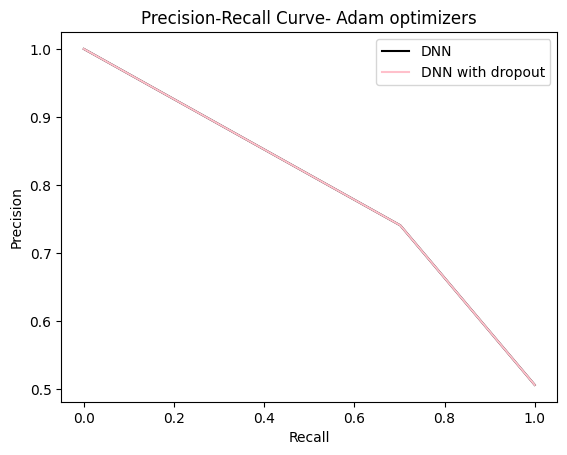

In [98]:
precision1, recall1, thresholds1 = precision_recall_curve(y_test, pred)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, dpred)
labels = ['DNN', 'DNN with dropout']
plt.plot(recall1, precision1, color='black', label=labels[0])
plt.plot(recall2, precision2, color='pink', label=labels[1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve- Adam optimizers')
plt.legend()
plt.show()

Layer-wise Dropout

In [100]:
#dropout rate-0.2
model3 = Sequential()
model3.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
75/75 [==============================] - 1s 7ms/step - loss: 0.6082 - accuracy: 0.6714 - val_loss: 0.5342 - val_accuracy: 0.7358
Epoch 2/20
75/75 [==============================] - 0s 6ms/step - loss: 0.4133 - accuracy: 0.8115 - val_loss: 0.5462 - val_accuracy: 0.7408
Epoch 3/20
75/75 [==============================] - 1s 9ms/step - loss: 0.3194 - accuracy: 0.8579 - val_loss: 0.6120 - val_accuracy: 0.7224
Epoch 4/20
75/75 [==============================] - 1s 8ms/step - loss: 0.2729 - accuracy: 0.8779 - val_loss: 0.6694 - val_accuracy: 0.7157
Epoch 5/20
75/75 [==============================] - 1s 9ms/step - loss: 0.2435 - accuracy: 0.8767 - val_loss: 0.7111 - val_accuracy: 0.7258
Epoch 6/20
75/75 [==============================] - 1s 8ms/step - loss: 0.2186 - accuracy: 0.8921 - val_loss: 0.7673 - val_accuracy: 0.7191
Epoch 7/20
75/75 [==============================] - 0s 5ms/step - loss: 0.2016 - accuracy: 0.9068 - val_loss: 0.8004 - val_accuracy: 0.7174
Epoch 8/20
75/75 [==

In [111]:
y_probs = model3.predict(X_test)
y_pred3 = (y_probs > 0.5).astype(int)
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f13 = f1_score(y_test, y_pred3)
cf3 = confusion_matrix(y_test, y_pred3)

24/24 [==============================] - 0s 2ms/step


In [102]:
#dropout rate-0.3
model4 = Sequential()
model4.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model4.add(Dropout(0.3))
model4.add(Dense(units=64, activation='relu'))
model4.add(Dense(units=1, activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
75/75 [==============================] - 2s 14ms/step - loss: 0.6339 - accuracy: 0.6651 - val_loss: 0.5316 - val_accuracy: 0.7375
Epoch 2/20
75/75 [==============================] - 1s 9ms/step - loss: 0.4308 - accuracy: 0.7985 - val_loss: 0.5492 - val_accuracy: 0.7375
Epoch 3/20
75/75 [==============================] - 1s 10ms/step - loss: 0.3505 - accuracy: 0.8378 - val_loss: 0.5901 - val_accuracy: 0.7224
Epoch 4/20
75/75 [==============================] - 1s 10ms/step - loss: 0.3020 - accuracy: 0.8645 - val_loss: 0.6336 - val_accuracy: 0.7274
Epoch 5/20
75/75 [==============================] - 1s 12ms/step - loss: 0.2702 - accuracy: 0.8750 - val_loss: 0.6872 - val_accuracy: 0.7124
Epoch 6/20
75/75 [==============================] - 0s 5ms/step - loss: 0.2535 - accuracy: 0.8829 - val_loss: 0.7188 - val_accuracy: 0.7324
Epoch 7/20
75/75 [==============================] - 0s 5ms/step - loss: 0.2196 - accuracy: 0.8992 - val_loss: 0.7662 - val_accuracy: 0.7258
Epoch 8/20
75/75

In [109]:
y_probs = model4.predict(X_test)
y_pred4 = (y_probs > 0.5).astype(int)
accuracy4 = accuracy_score(y_test, y_pred4)
precision4 = precision_score(y_test, y_pred4)
recall4 = recall_score(y_test, y_pred4)
f14 = f1_score(y_test, y_pred4)
cf4 = confusion_matrix(y_test, y_pred4)

24/24 [==============================] - 0s 3ms/step


In [103]:
#dropout rate-0.4
model5 = Sequential()
model5.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model5.add(Dropout(0.4))
model5.add(Dense(units=64, activation='relu'))
model5.add(Dense(units=1, activation='sigmoid'))

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
75/75 [==============================] - 3s 13ms/step - loss: 0.6453 - accuracy: 0.6505 - val_loss: 0.5340 - val_accuracy: 0.7358
Epoch 2/20
75/75 [==============================] - 1s 10ms/step - loss: 0.4695 - accuracy: 0.7834 - val_loss: 0.5142 - val_accuracy: 0.7425
Epoch 3/20
75/75 [==============================] - 1s 9ms/step - loss: 0.3880 - accuracy: 0.8236 - val_loss: 0.5410 - val_accuracy: 0.7358
Epoch 4/20
75/75 [==============================] - 1s 10ms/step - loss: 0.3258 - accuracy: 0.8457 - val_loss: 0.5844 - val_accuracy: 0.7241
Epoch 5/20
75/75 [==============================] - 0s 7ms/step - loss: 0.2784 - accuracy: 0.8737 - val_loss: 0.6410 - val_accuracy: 0.7391
Epoch 6/20
75/75 [==============================] - 0s 5ms/step - loss: 0.2662 - accuracy: 0.8779 - val_loss: 0.6685 - val_accuracy: 0.7308
Epoch 7/20
75/75 [==============================] - 0s 5ms/step - loss: 0.2482 - accuracy: 0.8817 - val_loss: 0.7166 - val_accuracy: 0.7258
Epoch 8/20
75/75 

In [110]:
y_probs = model5.predict(X_test)
y_pred5 = (y_probs > 0.5).astype(int)
accuracy5 = accuracy_score(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
f15 = f1_score(y_test, y_pred5)
cf5 = confusion_matrix(y_test, y_pred5)

24/24 [==============================] - 0s 2ms/step


In [112]:
print("Model Metrics")
print("Dropout Rate: 0.2")
print("Accuracy: ",accuracy3)
print("Precision: ",precision3)
print("Recall: ",recall3)
print("F1 Score: ",f13)

print("\nDropout Rate: 0.3")
print("Accuracy: ",accuracy4)
print("Precision: ",precision4)
print("Recall: ",recall4)
print("F1 Score: ",f14)

print("\nDropout Rate: 0.4")
print("Accuracy: ",accuracy5)
print("Precision: ",precision5)
print("Recall: ",recall5)
print("F1 Score: ",f15)

Model Metrics
Dropout Rate: 0.2
Accuracy:  0.7152406417112299
Precision:  0.7195767195767195
Recall:  0.7176781002638523
F1 Score:  0.7186261558784677

Dropout Rate: 0.3
Accuracy:  0.7179144385026738
Precision:  0.71875
Recall:  0.7282321899736148
F1 Score:  0.7234600262123199

Dropout Rate: 0.4
Accuracy:  0.7179144385026738
Precision:  0.7295081967213115
Recall:  0.7044854881266491
F1 Score:  0.7167785234899329


Monte Carlo Dropout

In [116]:
#monte Carlo
dropout_rate = 0.5
model6 = Sequential()
model6.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model6.add(Dropout(dropout_rate))
model6.add(Dense(units=64, activation='relu'))
model6.add(Dropout(dropout_rate))
model6.add(Dense(units=1, activation='sigmoid'))

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model6.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
75/75 [==============================] - 1s 8ms/step - loss: 0.8340 - accuracy: 0.5886 - val_loss: 0.5813 - val_accuracy: 0.7207
Epoch 2/20
75/75 [==============================] - 0s 5ms/step - loss: 0.6298 - accuracy: 0.6952 - val_loss: 0.5501 - val_accuracy: 0.7274
Epoch 3/20
75/75 [==============================] - 0s 6ms/step - loss: 0.5414 - accuracy: 0.7567 - val_loss: 0.5329 - val_accuracy: 0.7308
Epoch 4/20
75/75 [==============================] - 0s 6ms/step - loss: 0.4815 - accuracy: 0.7839 - val_loss: 0.5307 - val_accuracy: 0.7308
Epoch 5/20
75/75 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.8181 - val_loss: 0.5415 - val_accuracy: 0.7291
Epoch 6/20
75/75 [==============================] - 0s 5ms/step - loss: 0.3758 - accuracy: 0.8336 - val_loss: 0.5631 - val_accuracy: 0.7274
Epoch 7/20
75/75 [==============================] - 0s 5ms/step - loss: 0.3312 - accuracy: 0.8482 - val_loss: 0.5991 - val_accuracy: 0.7207
Epoch 8/20
75/75 [==

In [123]:
mc_samples = 50
pred1_mc = np.zeros((mc_samples, len(X_test)))

In [124]:
for i in range(mc_samples):
    pred1_mc[i] = model6.predict(X_test, batch_size=32).flatten()

24/24 [==============================] - 0s 2ms/step


In [125]:
mean_mc = np.mean(pred1_mc, axis=0)
std_mc = np.std(pred1_mc, axis=0)

In [128]:
print("Shape of y_test:", y_test.shape)
print("Shape of pred1_mc:", pred1_mc.shape)


Shape of y_test: (748,)
Shape of pred1_mc: (50, 748)


In [129]:
threshold = 0.5
pred_mc = (mean_mc > threshold).astype(int)
cf_mc_dropout = classification_report(y_test, pred_mc)
print("Classification Report (Monte Carlo Dropout):")
print(cf_mc_dropout)

Classification Report (Monte Carlo Dropout):
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       369
           1       0.75      0.73      0.74       379

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



In [130]:
accuracy6 = accuracy_score(y_test, pred_mc)
precision6 = precision_score(y_test, pred_mc)
recall6 = recall_score(y_test, pred_mc)
f16 = f1_score(y_test, pred_mc)
cf6 = confusion_matrix(y_test, pred_mc)

In [133]:
print("Monte Carlo Regularization-")
print("Accuracy: ",accuracy6)
print("Precision: ",precision6)
print("Recall: ",recall6)
print("F1 Score: ",f16)

Monte Carlo Regularization-
Accuracy:  0.7393048128342246
Precision:  0.7486486486486487
Recall:  0.7308707124010554
F1 Score:  0.7396528704939919


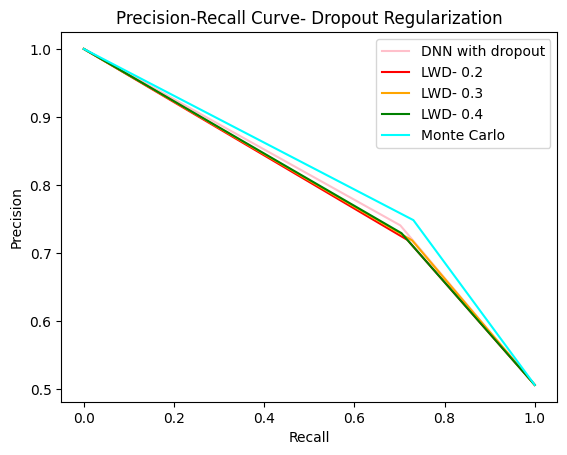

In [136]:
precision2, recall2, thresholds2 = precision_recall_curve(y_test, dpred)
precision3, recall3, thresholds3 = precision_recall_curve(y_test, y_pred3)
precision4, recall4, thresholds4 = precision_recall_curve(y_test, y_pred4)
precision5, recall5, thresholds5 = precision_recall_curve(y_test, y_pred5)
precision6, recall6, thresholds6 = precision_recall_curve(y_test, pred_mc)
labels = ['DNN with dropout','LWD- 0.2','LWD- 0.3','LWD- 0.4','Monte Carlo']
plt.plot(recall2, precision2, color='pink', label=labels[0])
plt.plot(recall3, precision3, color='red', label=labels[1])
plt.plot(recall4, precision4, color='orange', label=labels[2])
plt.plot(recall5, precision5, color='green', label=labels[3])
plt.plot(recall6, precision6, color='cyan', label=labels[4])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve- Dropout Regularization')
plt.legend()
plt.show()

 Conclusion-

1. Similar Accuracy: All the models have approximately the same accuracy, around 0.71, based on the Precision-Recall Curve.
2. With the help of MonteCarlo the accuracy of the model is getting increased to 73%.